https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas <br>
Here is a step by step guide on how to build the Hierarchical Clustering and Dendrogram out of our time series using SciPy. Please note that also scikit-learn (a powerful data analysis library built on top of SciPY) has many other clustering algorithms implemented. <br>
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/ <br>
https://scikit-learn.org/stable/modules/clustering.html


First we build some synthetic time series to work with. We'll build 6 groups of correlated time series and we expect the hierarchical clustering to detect those six groups.

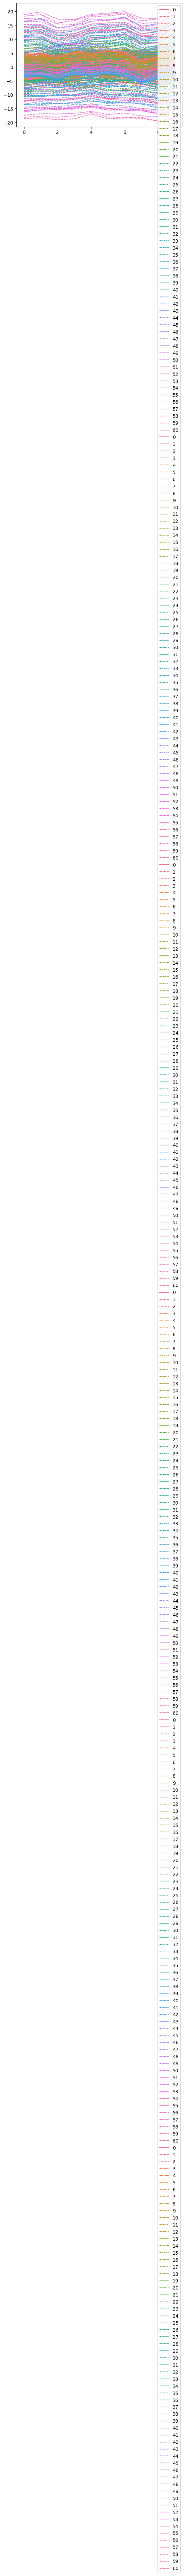

In [18]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples) 
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)

#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = pd.concat([timeSeries, df])
    

    # We use seaborn to plot what we have
    #ax = sns.tsplot(ax=ax, data=df.values, ci=[68, 95])
    ax = sns.lineplot(ax=ax, data=df.values, err_style="band") #err_style must be 'band' or 'bars' and not 'unit_traces'

plt.show()


Sure! Let's break down each step:

x = np.linspace(0, 5, num_samples): This line generates an array x of num_samples equally spaced numbers between 0 and 5. These numbers will be used as the x-axis values for the time series.

scale = 4: This line sets the value of the scale variable to 4. This variable will be used to scale the amplitudes of the sine and cosine functions later.

a = scale * np.sin(x): This line computes a time series a by taking the sine of each value in the x array and scaling it by the scale factor. This creates a sine wave with a frequency of 1 cycle over the interval [0, 5].

b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples)): This line computes a time series b by first computing a cosine wave with a frequency of 3 cycles over the interval [0, 5], shifted by 1 unit to the right. It then adds a linear trend (np.linspace(0, 1, num_samples)) to the cosine wave and scales the result by the scale factor.

c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples)): This line computes a time series c similarly to b, but using a sine wave with a frequency of 6 cycles over the interval [0, 5], shifted by 2 units to the right, and with a linear trend subtracted from it.

d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples)): This line computes a time series d similarly to b and c, but using a cosine wave with a frequency of 9 cycles over the interval [0, 5], shifted by 3 units to the right, and with a linear trend added to it.

e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples)): This line computes a time series e similarly to c, but using a sine wave with a frequency of 12 cycles over the interval [0, 5], shifted by 4 units to the right, and with a linear trend subtracted from it.

f = scale * np.cos(x): This line computes a time series f by taking the cosine of each value in the x array and scaling it by the scale factor. This creates a cosine wave with a frequency of 1 cycle over the


Certainly! Let's break down the code snippet:

python
Copy code
for arr in [a, b, c, d, e, f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
for arr in [a, b, c, d, e, f]:: This line starts a loop that iterates over each main time series stored in the variables a, b, c, d, e, f. In each iteration, arr will hold one of these main time series.

arr = arr + np.random.rand(group_size, num_samples): This line adds random noise to the current main time series arr.

np.random.rand(group_size, num_samples) generates an array of random numbers drawn from a uniform distribution between 0 and 1. The array has group_size rows and num_samples columns, corresponding to the number of random variations for each time series.
This array is added element-wise to the main time series arr, effectively adding random variations to each data point of the time series.
+ np.random.randn(group_size, 1): This line adds additional random noise to the current main time series arr.

np.random.randn(group_size, 1) generates an array of random numbers drawn from a standard normal distribution (mean=0, standard deviation=1). The array has group_size rows and 1 column.
This array is added element-wise to the previous result, introducing more random variations to each data point along the time series.
Overall, this loop generates group_size series of random variations for each main time series a, b, c, d, e, f, effectively creating 10 time series for each main time series. Each of these time series will have the same length as the original main time series. interval [0, 5].

In [21]:
df.values

array([[ 4.24246999e+00,  4.56172181e+00,  4.39688549e+00,
         4.48791901e+00,  3.82089234e+00,  3.92126085e+00,
         3.79469551e+00,  3.60004011e+00,  3.48667096e+00,
         3.44218117e+00,  3.31427179e+00,  2.92963981e+00,
         2.61549582e+00,  1.82098093e+00,  1.57795839e+00,
         2.01806782e+00,  1.49812478e+00,  9.74807327e-01,
         3.85686348e-01,  2.11286621e-01, -3.06888353e-01,
        -4.65494281e-01, -4.95897998e-01, -1.09588251e+00,
        -1.65011944e+00, -1.55327256e+00, -1.85694836e+00,
        -1.64653961e+00, -2.03130984e+00, -2.28530536e+00,
        -3.17737772e+00, -3.29854875e+00, -3.60867968e+00,
        -2.97376180e+00, -3.32558165e+00, -3.18356012e+00,
        -3.62354841e+00, -3.23711069e+00, -3.52762873e+00,
        -3.83041865e+00, -3.31289268e+00, -3.06549273e+00,
        -2.85136372e+00, -3.33071849e+00, -3.54783207e+00,
        -2.52088435e+00, -2.27263134e+00, -2.52962629e+00,
        -2.39230315e+00, -1.89668870e+00, -1.54710529e+0

In [20]:
a

array([ 0.        ,  0.33294766,  0.66358453,  0.98961584,  1.30877879,
        1.61885825,  1.91770215,  2.20323638,  2.47347921,  2.72655504,
        2.96070741,  3.17431121,  3.36588394,  3.534096  ,  3.67777992,
        3.79593848,  3.88775161,  3.95258208,  3.98997995,  3.99968565,
        3.98163183,  3.93594379,  3.86293862,  3.763123  ,  3.63718971,
        3.48601277,  3.31064141,  3.11229279,  2.89234353,  2.65232017,
        2.39388858,  2.11884238,  1.82909051,  1.52664397,  1.21360187,
        0.89213686,  0.56448003,  0.23290548, -0.10028554, -0.43278054,
       -0.76227185, -1.08647267, -1.40313291, -1.71005481, -2.00510819,
       -2.28624527, -2.55151484, -2.7990758 , -3.02720998, -3.23433403,
       -3.41901043, -3.57995743, -3.71605801, -3.82636755, -3.91012047,
       -3.96673549, -3.99581967, -3.99717116, -3.97078057, -3.91683107,
       -3.8356971 ])

Now we do the clustering and plot it:

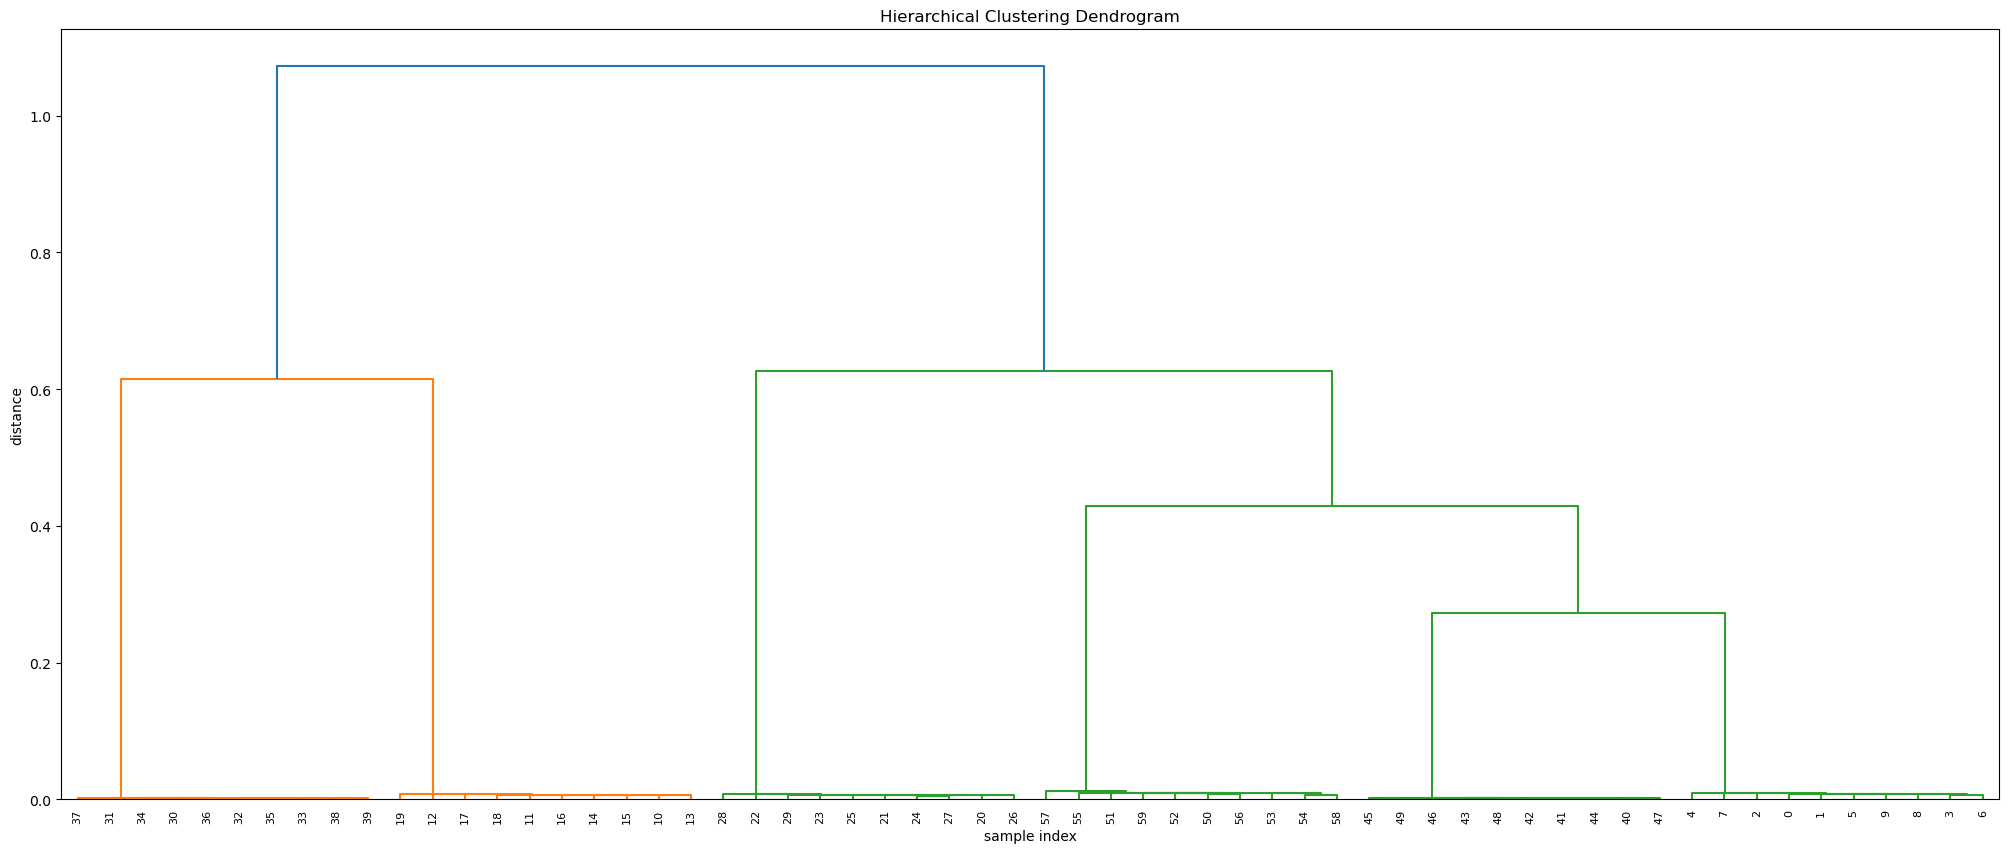

In [13]:
# Do the clustering
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

if we want to decide what kind of correlation to apply or to use another distance metric, then we can provide a custom metric function:

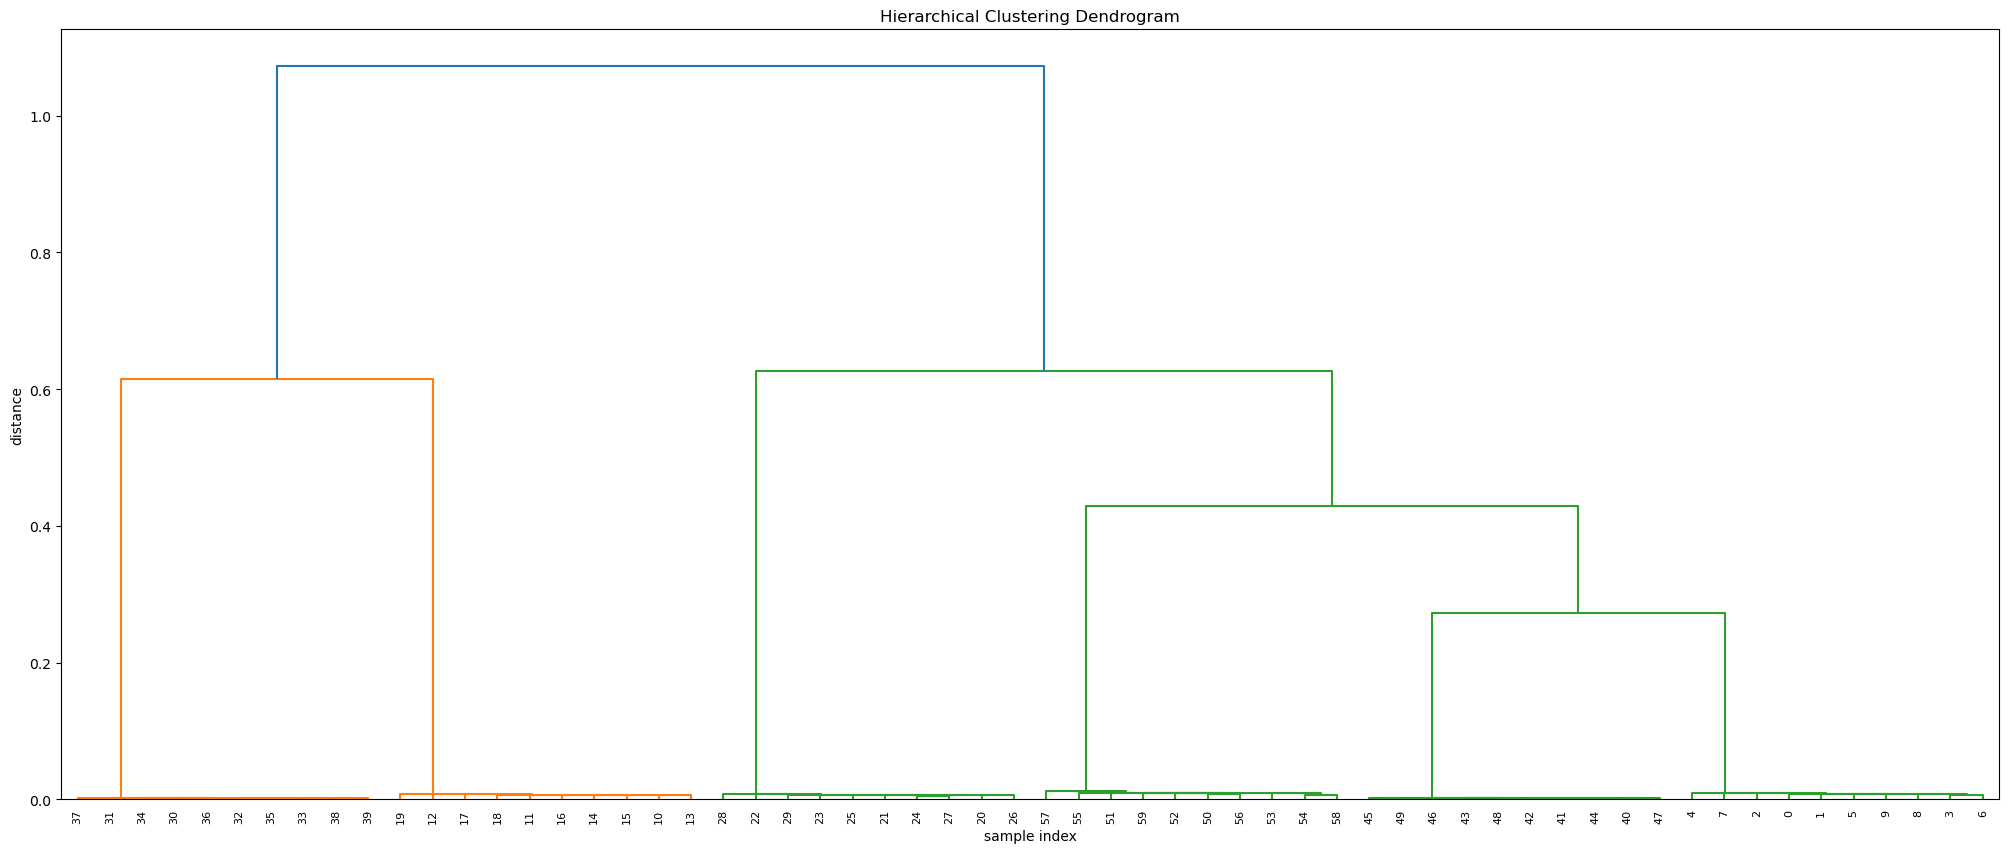

In [14]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

# Do the clustering    
Z = hac.linkage(timeSeries,  method='single', metric=my_metric)

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

To retrieve the Clusters we can use the fcluster function. It can be run in multiple ways (check the documentation) but in this example we'll give it as target the number of clusters we want:

In [15]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(timeSeries, Z, 6, plot=False)

Cluster 6 number of entries 10
Cluster 2 number of entries 10
Cluster 3 number of entries 10
Cluster 1 number of entries 10
Cluster 5 number of entries 10
Cluster 4 number of entries 10
